<a href="https://colab.research.google.com/github/Ichchhya/face_recognition/blob/master/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

In [2]:
!mkdir known

In [3]:
!mkdir unknown

unknown/billtest.jpeg
Processing billtest.jpeg
[False, True, False]


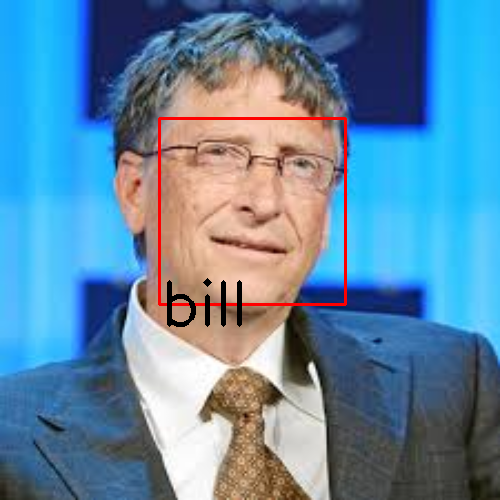

unknown/kpolitest.jpg
Processing kpolitest.jpg
[False, False, True]


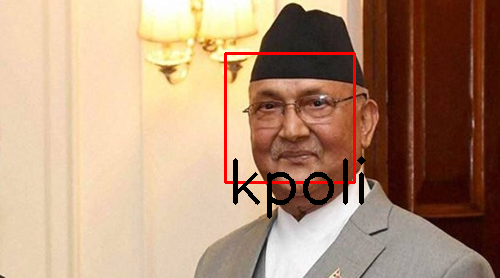

unknown/elontest2.jpg
Processing elontest2.jpg
[True, False, False]


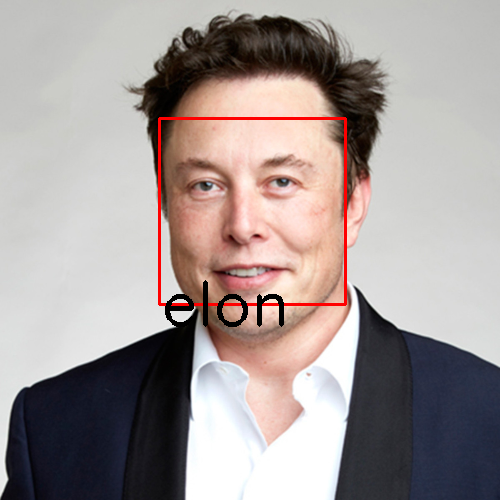

unknown/elontest.jpeg
Processing elontest.jpeg
[False, False, False]


In [94]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img=cv2.imread(path)
  # print(img.shape[:2])
  h,w= img.shape[:2]
  width=500
  ratio= width/float(w)
  height= int(h * ratio)
  return cv2.resize(img, (width , height))

known_encodings=[]
known_names=[]

known_dir='known/'

for imgfile in os.listdir(known_dir):
  paths=known_dir + imgfile
  if ".ipynb" in imgfile:
    pass
  else:
    img = read_img(paths)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(imgfile.split('.')[0])

unknown_dir = 'unknown/'
for imgfile in os.listdir(unknown_dir):
  if ".ipynb" in imgfile:
    pass
  else:
    filepath=unknown_dir + imgfile
    print(filepath)
    print("Processing", imgfile)
    img = read_img(filepath)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    print(results)
    for i in range(len(results)):
          if results[i]:
              name = known_names[i]
              # print(name)
              (top, right, bottom, left) = face_recognition.face_locations(img)[0]
              cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
              cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 3)
              cv2_imshow(img)

